In [233]:
import numpy as np
import matplotlib.pyplot as plt
import math
from hmmlearn import hmm


%matplotlib notebook

### Распределения и HMM в Python

Задаём распределения для матрицы переходово, матрицы наблюдений и начальное распределение.

In [234]:
M = 2
K = 6
L = 20

In [235]:
states = np.array([[0.95, 0.05],
                   [0.1,  0.9]])

In [236]:
emis = np.array([[0.16, 0.1],
                 [0.16, 0.1],
                 [0.16, 0.1],
                 [0.16, 0.1],
                 [0.16, 0.1],
                 [0.16, 0.5]
                            ])

In [237]:
start = np.array([0.5, 0.5])

In [238]:
emis = emis.T

In [239]:
emis

array([[0.16, 0.16, 0.16, 0.16, 0.16, 0.16],
       [0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.5 ]])

Так же в Python есть модуль для формирования HMM по начальным матрицам, я воспользовался им, чтобы сравнивать своё апостериорное распределение и прогноз алгоритма Витерби. И с помощью него я формировал начальные вектор переходов и вектор наблюдений $X[1]$ и $X[0]$ соответсвенно.

In [240]:
model = hmm.MultinomialHMM(n_components=M)

In [241]:
model.startprob_ = start

In [242]:
model.transmat_ = states

In [243]:
model.emissionprob_ = emis

In [244]:
X=model.sample(L)

In [245]:
X[0]

array([[3],
       [5],
       [4],
       [3],
       [0],
       [0],
       [0],
       [3],
       [1],
       [3],
       [1],
       [2],
       [2],
       [3],
       [0],
       [5],
       [0],
       [5],
       [5],
       [0]], dtype=int64)

### Алгоритм Витерби

для j = 0: $$MK[i, j] = emis[j, X[0][i]]\cdot max(MK[i-1][1]\cdot states[1,0], MK[i-1][j]\cdot states[j, j])$$
для j = 1: $$MK[i, j] = emis[j, X[0][i]]\cdot max(MK[i-1][0]\cdot states[0,1], MK[i-1][j]\cdot states[j, j])$$
$X[0]$ - сгенерированный вектор наблюдений

$MK$ - матрица вероятностей для $j$-той кости(0 - честная, 1 - нечестная), $i$-того наблюдения (0:5)

$emis$ - матрица наблюдений 

$states$ - матрица переходов

In [246]:
MK = np.zeros((L, M))
#MK1 = np.zeros((L, M))

In [247]:
for j in range(M):
    MK[0, j] = emis[j, X[0][0]]*start[j]
    #MK1[0, j] = math.log2(emis[j, X[0][0]])+math.log2(start[j])

In [248]:
for i in range(1, L):
    for j in range(M):
        if j == 0:
            MK[i, j] = emis[j, X[0][i]]*max(MK[i-1][1]*states[1,0], MK[i-1][j]*states[j, j])
            #MK1[i, j] = math.log2(emis[j, X[0][i]])+(max(MK1[i-1][1]+math.log2(states[1,0]), 
            #                                                      MK1[i-1][0]+math.log2(states[0, 0])))
        if j == 1:
            MK[i, j] =emis[j, X[0][i]]*max(MK[i-1][0]*states[0,1], MK[i-1][j]*states[j,j])
            #MK1[i, j] = math.log2(emis[j, X[0][i]])+(max(MK1[i-1][0]+math.log2(states[0,1]), 
            #                                                      MK1[i-1][1]+math.log2(states[1, 1])))

In [249]:
MK

array([[8.00000000e-02, 5.00000000e-02],
       [1.21600000e-02, 2.25000000e-02],
       [1.84832000e-03, 2.02500000e-03],
       [2.80944640e-04, 1.82250000e-04],
       [4.27035853e-05, 1.64025000e-05],
       [6.49094496e-06, 1.47622500e-06],
       [9.86623634e-07, 1.32860250e-07],
       [1.49966792e-07, 1.19574225e-08],
       [2.27949524e-08, 1.07616803e-09],
       [3.46483277e-09, 1.13974762e-10],
       [5.26654581e-10, 1.73241639e-11],
       [8.00514964e-11, 2.63327291e-12],
       [1.21678274e-11, 4.00257482e-13],
       [1.84950977e-12, 6.08391372e-14],
       [2.81125485e-13, 9.24754886e-15],
       [4.27310738e-14, 7.02813713e-15],
       [6.49512321e-15, 6.32532342e-16],
       [9.87258728e-16, 2.84639554e-16],
       [1.50063327e-16, 1.28087799e-16],
       [2.28096257e-17, 1.15279019e-17]])

Можно сравнить то, что мы получили из Витерби с сгенерированным и с предсказанием питоновского модуля

In [250]:
X[1]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [251]:
myvit = np.argmax(MK, axis = 1)
myvit

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [252]:
model.decode(X[0])[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<IPython.core.display.Javascript object>


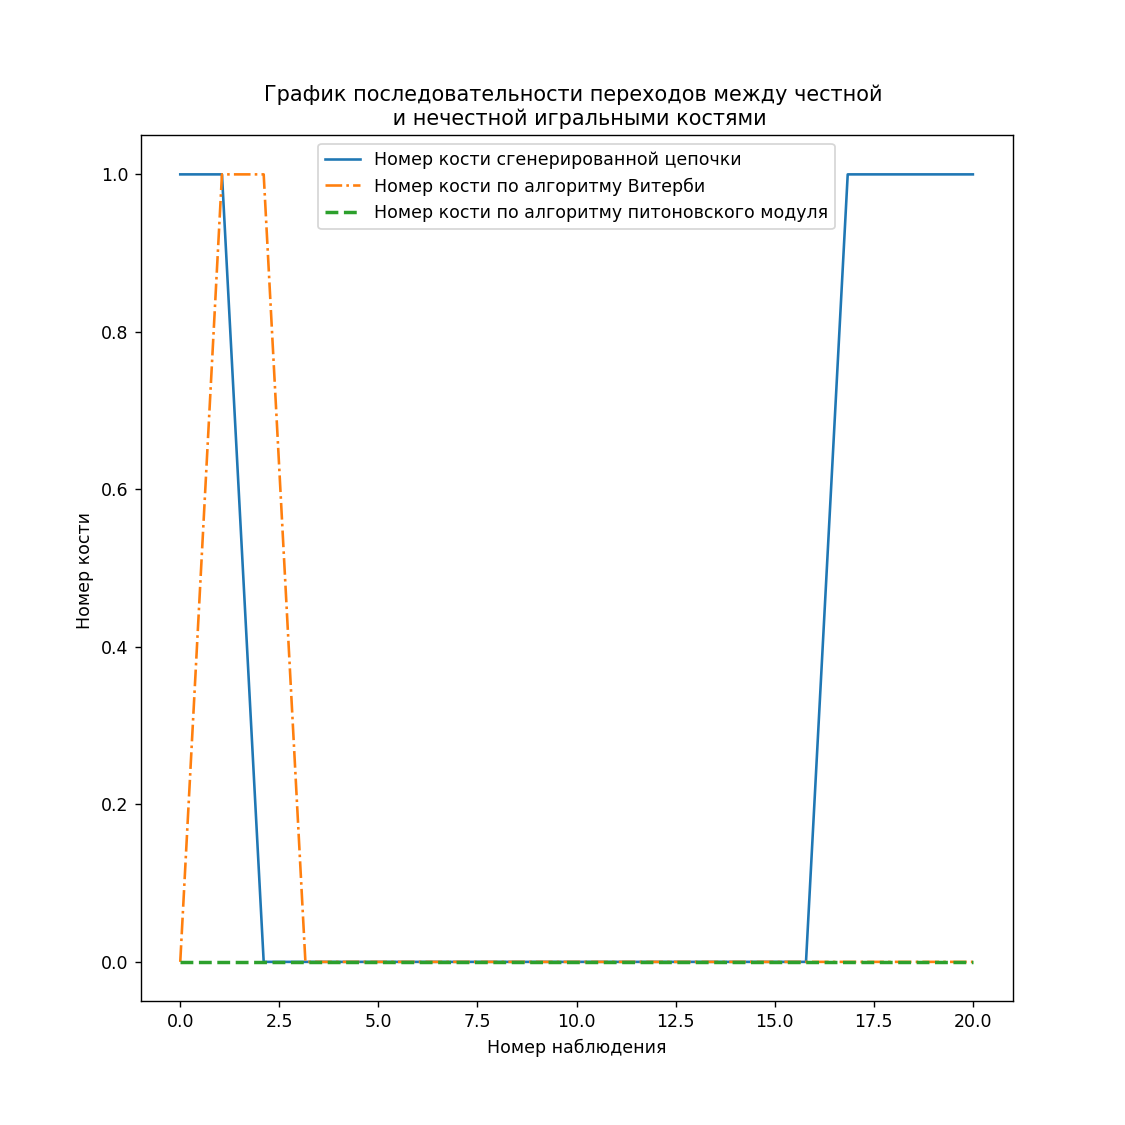

In [289]:
s = np.linspace(0, L, L)
fig, ax = plt.subplots(1,1,figsize=(9, 9))
ax.set_title('График последовательности переходов между честной \n и нечестной игральными костями')
ax.set_ylabel('Номер кости ')
ax.set_xlabel('Номер наблюдения')
ax.plot(s, X[1], label = 'Номер кости сгенерированной цепочки ')
ax.plot(s, np.argmax(MK, axis = 1), '-.', label = 'Номер кости по алгоритму Витерби')
ax.plot(s, model.decode(X[0])[1],'--', label = 'Номер кости по алгоритму питоновского модуля', linewidth=2 )
ax.legend()

### Алгоритм прямого хода

для j = 0: $$PU[i, j] = PU[i-1][j]\cdot states[j,j]\cdot emis[j, X[0][i-1]]+PU[i-1][1]\cdot states[1,j]\cdot emis[j, X[0][i-1]]$$
для j = 1: $$PU[i, j] = PU[i-1][j]\cdot states[j,j]\cdot emis[j, X[0][i-1]]+PU[i-1][0]\cdot states[0,j]\cdot emis[j, X[0][i-1]]$$
$X[0]$ - сгенерированный вектор наблюдений

$PU$ - матрица вероятностей алгоритма прямого хода для $j$-той кости(0 - честная, 1 - нечестная), $i$-того наблюдения (0:5)

$emis$ - матрица наблюдений 

$states$ - матрица переходов


In [253]:
PU = np.zeros((L+1, M))
#PU1 = np.zeros((L+1, M))
PU[0] = start
#PU1[0][0] = math.log2(start[0])
#PU1[0][1] = math.log2(start[1])

In [254]:
for j in range(M):
    PU[1, j] = emis[j, X[1][0]]*start[j]
    #PU1[1, j] = math.log2(emis[j, X[1][0]]) + math.log2(start[j])

In [255]:
for i in range(2, L+1):
    for j in range(M):
            if j == 0:
                PU[i, j] = PU[i-1][j]*states[j,j]*emis[j, X[0][i-1]]+PU[i-1][1]*states[1,j]*emis[j, X[0][i-1]]
                #PU1[i, j] = PU1[i-1][j]+math.log2(states[j,j]) + math.log2(emis[j, X[0][i-1]]) 
                #+ PU1[i-1][1] + math.log2(states[1,j]) + math.log2(emis[j, X[0][i-1]])
            if j == 1:
                PU[i, j] = PU[i-1][j]*states[j,j]*emis[j, X[0][i-1]]+PU[i-1][0]*states[0,j]*emis[j, X[0][i-1]]
                #PU1[i, j] = PU1[i-1][j]+math.log2(states[j,j]) + math.log2(emis[j, X[0][i-1]]) 
                #+ PU1[i-1][1] + math.log2(states[0,j]) + math.log2(emis[j, X[0][i-1]])

### Алгоритм обратного хода

для j = 0: $$PU_b[i, j] = PU_b[i+1][j]\cdot states[j,j]\cdot emis[j, X[0][i]] + PU_b[i+1][1]\cdot states[j, 1]\cdot emis[j, X[0][i]]$$
для j = 1: $$PU_b[i, j] = PU_b[i+1][j]\cdot states[j,j]\cdot emis[j, X[0][i]] + PU_b[i+1][0]\cdot states[j, 0]\cdot emis[j, X[0][i]]$$
$X[0]$ - сгенерированный вектор наблюдений

$PU_b$ - матрица вероятностей алгоритма обратного хода для $j$-той кости(0 - честная, 1 - нечестная), $i$-того наблюдения (0:5)

$emis$ - матрица наблюдений 

$states$ - матрица переходов

In [256]:
PU_b = np.zeros((L+1, M))
#PU_b1 = np.zeros((L+1, M))

In [257]:
for j in range(M):
    PU_b[L, j] = 1
   # PU_b1[L, j] = math.log2(1)

In [258]:
for i in range(L-1,-1,-1):
    for j in range(M):
            if j == 0:
                PU_b[i, j] = PU_b[i+1][j]*states[j,j]*emis[j, X[0][i]] + PU_b[i+1][1]*states[j, 1]*emis[j, X[0][i]]
               # PU_b1[i, j] = PU_b1[i+1][j] + math.log2(states[j,j]) + math.log2(emis[j, X[0][i]])
               # + PU_b1[i+1][1] + math.log2(states[j, 1]) + math.log2(emis[j, X[0][i]])
            if j == 1:
                PU_b[i, j] = PU_b[i+1][j]*states[j,j]*emis[j, X[0][i]] + PU_b[i+1][0]*states[j, 0]*emis[j, X[0][i]]
               # PU_b1[i, j] = PU_b1[i+1][j] + math.log2(states[j,j]) + math.log2(emis[j, X[0][i]])
               # +PU_b1[i+1][1] + math.log2(states[j, 0]) + math.log2(emis[j, X[0][i]])

Вероятность существования цепочки по алгоритму прямого хода

In [259]:
sum(PU[-1])

1.3168057833952118e-16

Вероятность существования цепочки по алгоритму обратного хода

In [260]:
sum(PU_b[0]*start)

1.3168057833952115e-16

Всё верно, так как эти вероятности должны быть равны, но опять же стоит иметь в виду, что для расчёта нужно применять логарфмирование, т.к. теряется точность и они могут оказаться неравны из-за чего апостериорное распределение может быть посчитано неверно

### Апостериорное распределение

Матрица апостериорного распределения $Pd$

In [261]:
Pd = np.zeros((L, M))

In [262]:
for i in range(L):
    for j in range(M):
        Pd[i, j] = (PU[i,j]*PU_b[i,j])/sum(PU[-1])

In [263]:
Pd

array([[0.65905126, 0.34094874],
       [0.66572969, 0.33260071],
       [0.70355902, 0.21438404],
       [0.83636691, 0.13137911],
       [0.91292922, 0.08352766],
       [0.95668754, 0.05617872],
       [0.98103961, 0.04095867],
       [0.99344149, 0.0332075 ],
       [0.99769032, 0.03055198],
       [0.995087  , 0.03217905],
       [0.98483446, 0.03858689],
       [0.96379361, 0.05173742],
       [0.92552224, 0.07565703],
       [0.85830255, 0.11766933],
       [0.74155347, 0.19063751],
       [0.53952915, 0.31690271],
       [0.47589604, 0.51575619],
       [0.37807738, 0.57689285],
       [0.34952504, 0.66611892],
       [0.37056847, 0.6003582 ]])

In [264]:
model.predict_proba(X[0])

array([[0.65905126, 0.34094874],
       [0.67405131, 0.32594869],
       [0.80138412, 0.19861588],
       [0.87492324, 0.12507676],
       [0.91718462, 0.08281538],
       [0.94110769, 0.05889231],
       [0.95401714, 0.04598286],
       [0.95986552, 0.04013448],
       [0.96044349, 0.03955651],
       [0.95592801, 0.04407199],
       [0.94493653, 0.05506347],
       [0.92410372, 0.07589628],
       [0.88705108, 0.11294892],
       [0.82243395, 0.17756605],
       [0.71046808, 0.28953192],
       [0.51687217, 0.48312783],
       [0.47104849, 0.52895151],
       [0.36892145, 0.63107855],
       [0.36362031, 0.63637969],
       [0.44809736, 0.55190264]])

   Стоит отметить, что моё апостериорное распределение равно с небольшой погрешностью апостеорному распределение питоновского модуля.
   
   Так же стоит отметить, что точность теряется из-за того, что я не стал применять логарифмирование.

Небольшая фун-ция для подсчёта ошибок

In [265]:
fal = 0
fal1 = 0
fal2 = 0
fal3 = 0
for i in range(L):
    if X[1][i]!=model.predict(X[0])[i]:
        fal +=1
    if X[1][i]!=np.argmax(model.predict_proba(X[0]), axis = 1)[i]:
        fal1 +=1
    if X[1][i]!=myvit[i]:
        fal2 +=1
    if X[1][i]!=np.argmax(Pd, axis=1)[i]:
        fal3 +=1

In [266]:
print("Процент ошибок в алгоритме питоновского модуля",fal/L)
print("Процент ошибок в апостериорном распределении питоновского модуля",fal1/L)
print("Процент ошибок в моём алгоритме Витерби", fal2/L)
print("Процент ошибок в моём апостериорном распределении", fal3/L)

Процент ошибок в алгоритме питоновского модуля 0.3
Процент ошибок в апостериорном распределении питоновского модуля 0.1
Процент ошибок в моём алгоритме Витерби 0.3
Процент ошибок в моём апостериорном распределении 0.1


<IPython.core.display.Javascript object>


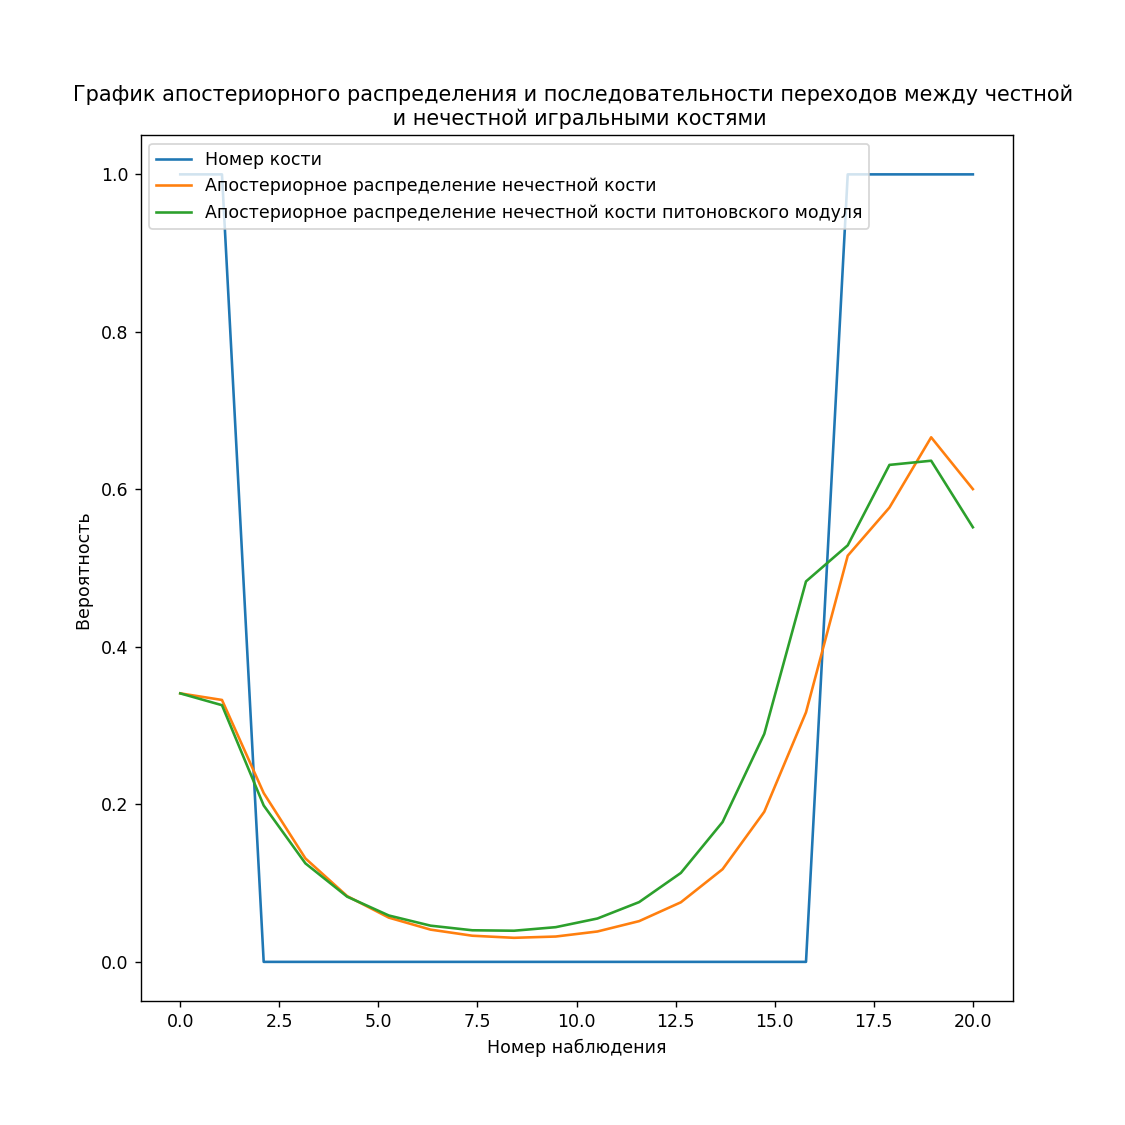

In [273]:
s = np.linspace(0, L, L)
fig, ax = plt.subplots(1,1,figsize=(9, 9))
ax.set_title('График апостериорного распределения и последовательности переходов между честной \n и нечестной игральными костями')
ax.set_ylabel('Вероятность ')
ax.set_xlabel('Номер наблюдения')
ax.plot(s, X[1], label = 'Номер кости')
#ax.scatter(s, X[0]/5, label = 'Кол-во очков разделённое на 5', color='r')
ax.plot(s, Pd[::, 1], label = 'Апостериорное распределение нечестной кости')
ax.plot(s, model.predict_proba(X[0])[::, 1], label = 'Апостериорное распределение нечестной кости питоновского модуля')
ax.legend()

### Результаты

В результате с помощью алгоритма Витерби была сгенерирована наиболее вероятная последовательность переходов по последовательности наблюдений. По алготимам прямого и обратного ходов были найдены вероятности существавания данной последовательности наблюдений и восстановленно апостериорное распределение. Результаты были сравнены с исходной последовательностью наблюдений и с алгоритмами представленными в модули hmmlearn.